In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from blg_strain.hamiltonian import Hfunc

In [6]:
kx = np.linspace(-1, 1, 3)
ky = np.linspace(-1, 1, 2)
Kx, Ky = np.meshgrid(kx, ky)

H = Hfunc(Kx, Ky)
H.shape

(4, 4, 2, 3)

In [4]:
E, Psi = np.linalg.eigh(H)

LinAlgError: Last 2 dimensions of the array must be square

In [5]:
E.shape, Psi.shape

NameError: name 'E' is not defined

In [5]:
H.swapaxes(0, 2).swapaxes(1,3).shape

(50, 50, 4, 4)

In [102]:
E = E.swapaxes(0,1).swapaxes(0,2) # put the kx,ky points in last 2 dims
Psi = Psi.swapaxes(0, 2).swapaxes(1,3) # put the kx,ky points in last 2 dims
# Psi = Psi.transpose((1,0,2,3))

In [103]:
E.shape, Psi.shape

((4, 2, 3), (4, 4, 2, 3))

In [108]:
(Psi.real * multiplier)[0,:,:,:]

array([[[1.95892052e-09, 1.38516598e-09, 1.95892051e-09],
        [1.95892052e-09, 1.38516598e-09, 1.95892051e-09]],

       [[7.07106770e-01, 7.07106777e-01, 7.07106759e-01],
        [7.07106770e-01, 7.07106777e-01, 7.07106759e-01]],

       [[7.07106792e-01, 7.07106785e-01, 7.07106803e-01],
        [7.07106792e-01, 7.07106785e-01, 7.07106803e-01]],

       [[1.59702391e-09, 1.12926644e-09, 1.59702391e-09],
        [1.59702391e-09, 1.12926644e-09, 1.59702391e-09]]])

In [ ]:
np.multiply()

In [1]:
from blg_strain.bands import get_bands

In [4]:
E, Psi, Omega, Mu = get_bands()

ValueError: too many values to unpack (expected 4)

# Get bands

In [18]:
from blg_strain.bands import get_bands

In [4]:
kx, ky, Kx, Ky, E, Psi, Omega, Mu = get_bands(Nkx=20, Nky=20, Delta=0.02, delta=0.02)

In [7]:
E.shape, Psi.shape

((4, 20, 20), (4, 4, 20, 20))

In [7]:
E.shape

(4, 20, 20)

<IPython.core.display.Javascript object>


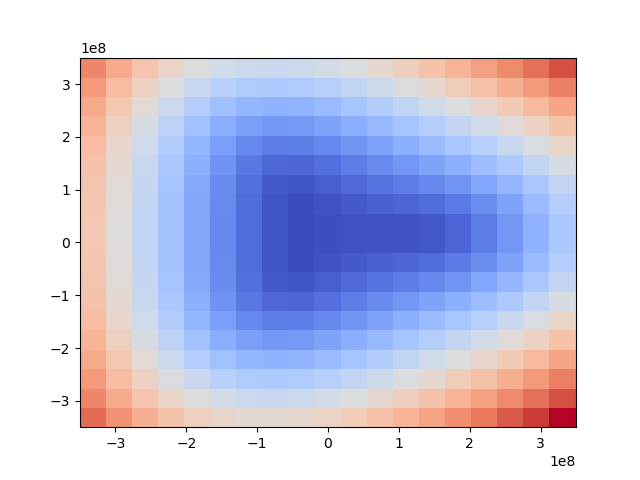

In [21]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, E[2], cmap='coolwarm')

<IPython.core.display.Javascript object>


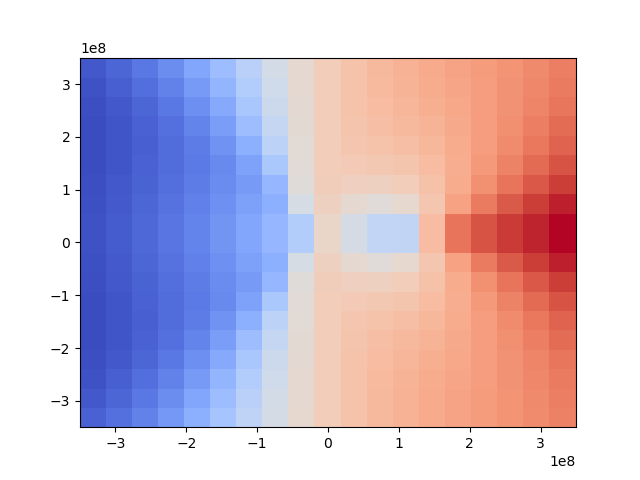

In [31]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, Psi[2, 3].real, cmap='coolwarm')

In [25]:
Psi

array([[[[ 0.38927981+0.j        ,  0.38334666+0.j        ,
           0.37704333+0.j        , ...,  0.35676253-0.j        ,
           0.36528606-0.j        ,  0.37382813-0.j        ],
         [ 0.38124863+0.j        ,  0.37441694+0.j        ,
           0.36710508+0.j        , ...,  0.34962153+0.j        ,
           0.35963379-0.j        ,  0.3694081 -0.j        ],
         [ 0.37269851+0.j        ,  0.36480559+0.j        ,
           0.35628202+0.j        , ...,  0.34248475+0.j        ,
           0.35410464+0.j        ,  0.36516455-0.j        ],
         ...,
         [ 0.37269851+0.j        ,  0.36480559+0.j        ,
           0.35628202+0.j        , ...,  0.34248475+0.j        ,
           0.35410464+0.j        ,  0.36516455-0.j        ],
         [ 0.38124863+0.j        ,  0.37441694+0.j        ,
           0.36710508+0.j        , ...,  0.34962153+0.j        ,
           0.35963379-0.j        ,  0.3694081 -0.j        ],
         [ 0.38927981+0.j        ,  0.38334666+0.j      

# Vectorize berry curvature

In [123]:
kx, ky, Kx, Ky, E, Psi, Omega, Mu = get_bands(Nkx=2, Nky=3, Delta=0.02, delta=0.02)

In [124]:
E.shape, Psi.shape

((4, 3, 2), (4, 4, 3, 2))

In [125]:
Omega = np.empty_like(E)
Mu = np.empty_like(E)

In [126]:
from blg_strain.hamiltonian import H_dkx, H_dky

In [127]:
xi = 1
hdkx, hdky = H_dkx(xi), H_dky()
hdkx.shape

(4, 4)

In [128]:
for n, (e_n, psi_n) in enumerate(zip(E, Psi)):
    for e_m, psi_m in zip(E, Psi):
        pass

In [129]:
e_m.shape, psi_m.shape

((3, 2), (4, 3, 2))

In [133]:
result1 = np.tensordot(hdkx, psi_n, axes=[-1, 0])
result1.shape

(4, 3, 2)

In [136]:
result2 = np.tensordot(psi_m, result1, axes=[0,0])
result2.shape

(3, 2, 3, 2)

Not quite the result we wanted... let's write down some test matrices.

In [148]:
A = np.array([
    [1, 1, 1, 1],
    [0, 1, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 0, 1],
])

In [217]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]
             ])
b = np.array([[-1, -2, -3, -4],
              [-5, -6, -7, -8]
             ]).T
a, b, a.shape, b.shape

(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]), array([[-1, -5],
        [-2, -6],
        [-3, -7],
        [-4, -8]]), (2, 4), (4, 2))

In [218]:
a.dot(A) # does as expected

array([[ 1,  3,  6, 10],
       [ 5, 11, 18, 26]])

In [219]:
A.dot(b) # does as expected

array([[-10, -26],
       [ -9, -21],
       [ -7, -15],
       [ -4,  -8]])

In [228]:
a.shape, A.dot(b).shape

((2, 4), (4, 2))

In [234]:
np.einsum('ij,ji->i', a, A.dot(b)) # I think this is the result we want

array([ -65, -425])

In [240]:
# Einsum from the beginning?
np.einsum('ij, jk, ki->i', a, A, b)

array([ -65, -425])

In [242]:
# Confirm with dot and single vectors:
a = np.array([[5, 6, 7, 8],
             ])
b = np.array([[-5, -6, -7, -8],
             ]).T
a.dot(A.dot(b))

array([[-425]])

## try einsum on the data another axis

In [243]:
kx, ky, Kx, Ky, E, Psi, Omega, Mu = get_bands(Nkx=2, Nky=3, Delta=0.02, delta=0.02)

In [244]:
E.shape, Psi.shape

((4, 3, 2), (4, 4, 3, 2))

In [245]:
Omega = np.empty_like(E)
Mu = np.empty_like(E)

In [246]:
from blg_strain.hamiltonian import H_dkx, H_dky

In [247]:
xi = 1
hdkx, hdky = H_dkx(xi), H_dky()
hdkx.shape

(4, 4)

In [250]:
for n, (e_n, psi_n) in enumerate(zip(E, Psi)):
    for e_m, psi_m in zip(E, Psi):
        pass
e_n.shape, psi_n.shape

((3, 2), (4, 3, 2))

In [253]:
M = np.einsum('ijk,il,ljk->jk', psi_n, hdkx, psi_m)
M.shape

(3, 2)

Cool! Did this work? Let's confirm by looping.

In [256]:
Psi.shape

(4, 4, 3, 2)

In [283]:
M2 = np.empty_like(E[0], dtype='complex')

for n, (e_n, psi_n) in enumerate(zip(E, Psi)):
    for e_m, psi_m in zip(E, Psi):
        pass


    
for i in range(Psi.shape[2]):
    for j in range(Psi.shape[3]):
        pn = psi_n[:, i, j].reshape(1,4)
        pm = psi_m[:, i, j].reshape(4,1)
        M2[i, j] = pn.dot(hdkx.dot(pm))[0,0]

In [285]:
M, M2

(array([[ 4.84248577e-11-3.52758662e-10j,  4.50331710e-11-4.26387445e-10j],
        [-4.58073488e-10+0.00000000e+00j,  5.11119908e-10+0.00000000e+00j],
        [ 4.84248577e-11+3.52758662e-10j,  4.50331710e-11+4.26387445e-10j]]),
 array([[ 4.84248577e-11-3.52758662e-10j,  4.50331710e-11-4.26387445e-10j],
        [-4.58073488e-10+0.00000000e+00j,  5.11119908e-10+0.00000000e+00j],
        [ 4.84248577e-11+3.52758662e-10j,  4.50331710e-11+4.26387445e-10j]]))

# Berry curvature and magnetic moment

In [1]:
from blg_strain.bands import get_bands

In [2]:
kx, ky, Kx, Ky, E, Psi, Omega, Mu = get_bands(Nkx=200, Nky=200, Delta=0.02, delta=0.02)

In [4]:
from blg_strain.berry import berry_mu

In [5]:
Omega, Mu = berry_mu(E, Psi)

<IPython.core.display.Javascript object>


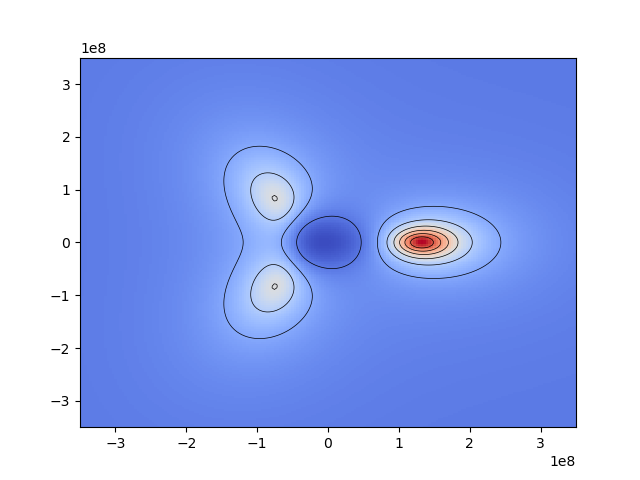

In [20]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, Mu[1], cmap='coolwarm')
ax.contour(Kx, Ky, Mu[1], colors='k', linewidths=0.5)

In [2]:
from blg_strain.bands import get_bands

In [3]:
kx, ky, Kx, Ky, E, Psi, Omega, Mu = get_bands(Nkx=200, Nky=200, xi=1, Delta=0.02, delta=0.02)
kx, ky, Kx, Ky, E1, Psi1, Omega1, Mu1 = get_bands(Nkx=200, Nky=200, xi=-1, Delta=0.02, delta=0.02)

In [4]:
from blg_strain.utils.plotting import plot_bands, plot_bands_KKprime

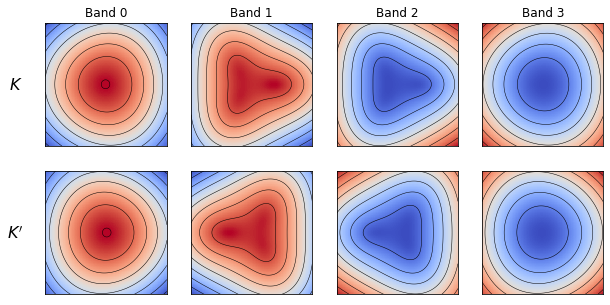

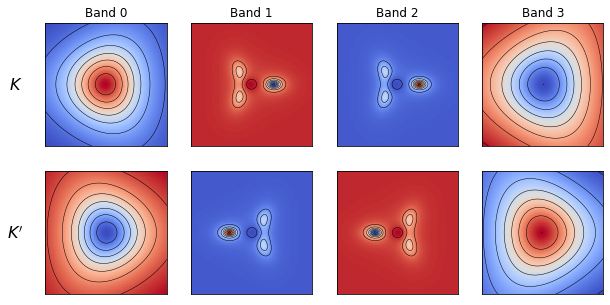

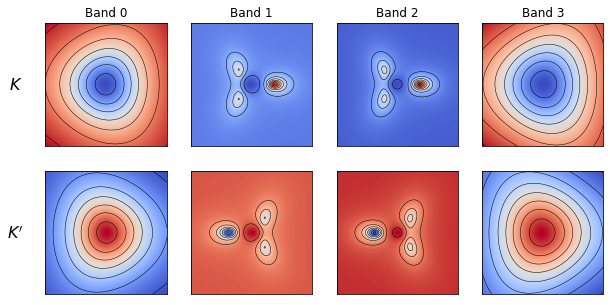

In [5]:
fig, ax = plot_bands_KKprime(Kx, Ky, E, E1)
# fig.savefig('../plots/E_Delta20meV_delta2.png', bbox_inches='tight')
fig, ax = plot_bands_KKprime(Kx, Ky, Omega, Omega1)
# fig.savefig('../plots/Omega_Delta20meV_delta2.png', bbox_inches='tight')
fig, ax = plot_bands_KKprime(Kx, Ky, Mu, Mu1)
# fig.savefig('../plots/Mu_Delta20meV_delta2.png', bbox_inches='tight')

# Microscopic

In [4]:
from blg_strain.microscopic import grad_feq_func, grad_feq_func_2

<IPython.core.display.Javascript object>


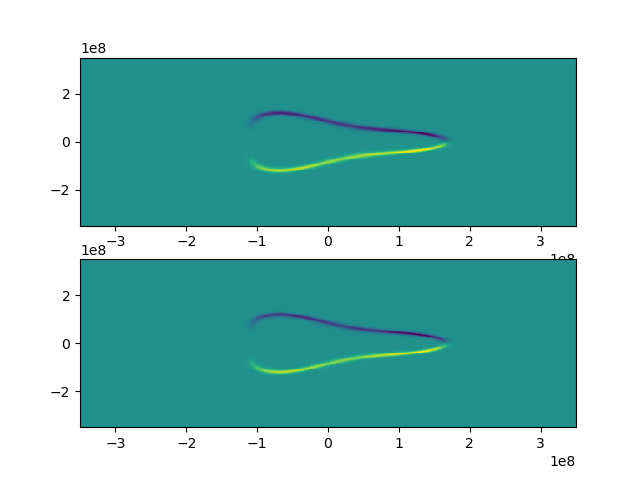

In [29]:
gffx, gffy = grad_feq_func(kx, ky, E, .02, 10)
gff2x, gff2y = grad_feq_func_2(kx, ky, E, .02, 10)
fig, ax = plt.subplots(2)
n = 2
ax[0].pcolormesh(Kx, Ky, gffy[n])
ax[1].pcolormesh(Kx, Ky, gff2y[n])

<IPython.core.display.Javascript object>


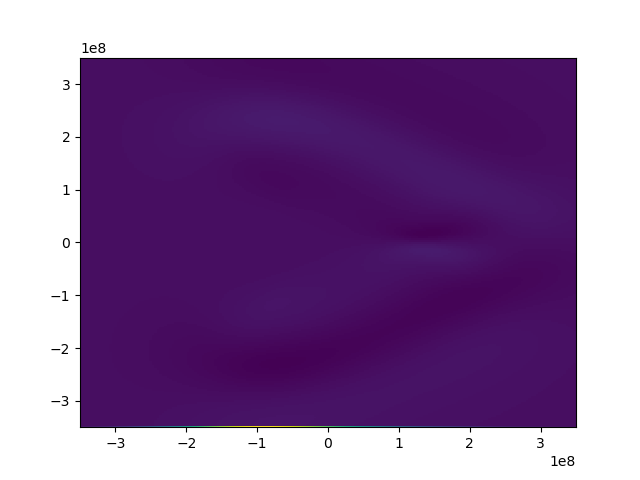

In [20]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, gffy[n]-gff2y[n])

In [30]:
%matplotlib notebook

<IPython.core.display.Javascript object>


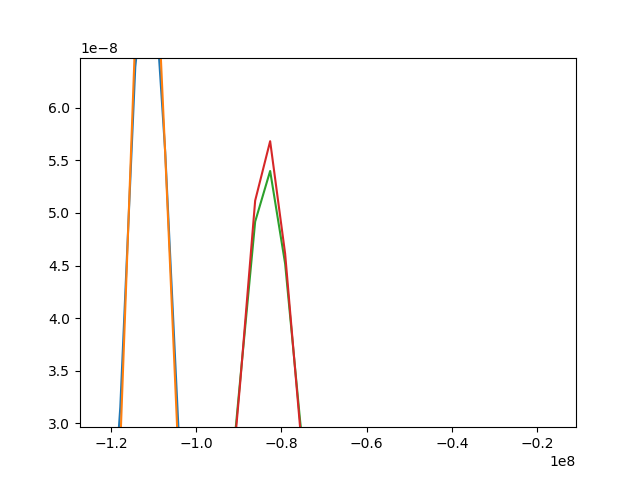

In [31]:
fig, ax = plt.subplots()
ax.plot(kx, gffx[n, 100, :])
ax.plot(kx, gff2x[n, 100, :])
ax.plot(ky, gffy[n, :, 100])
ax.plot(ky, gff2y[n, :, 100])

In [6]:
gffx[n].max(), gff2x[n].max()

(1.0571201015327703e-07, 1.3628535753458515e-07)

In [7]:
from blg_strain.microscopic import feq_func, meff_func

In [8]:
feq_func(np.array([0,1]), 0.5, 0)

array([1., 0.])

In [9]:
meff = meff_func(kx, ky, E)
meff.shape

(4, 1000, 1000, 2, 2)

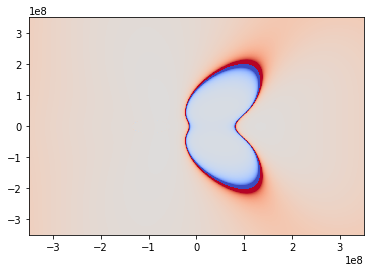

In [10]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, meff[2, :, :, 0, 0], cmap='coolwarm', vmin=-1, vmax=1)

In [11]:
from blg_strain.macroscopic import n_func

In [12]:
EF,T = 0.02000, 0
n_func(kx, ky, E, Psi, EF, T=T, layer=1), n_func(kx, ky, E, Psi, EF, T=T, layer=2)

cond 1
cond2
cond2
cond 1


(4016857041474168.5, 4016857041474168.5)

In [32]:
A.T

array([[[ 1,  5,  9],
        [ 3,  7, 11]],

       [[ 2,  6, 10],
        [ 4,  8, 12]]])